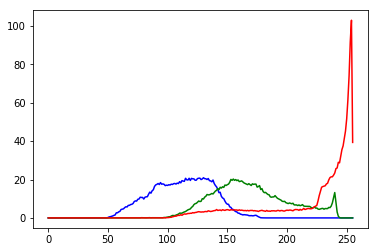

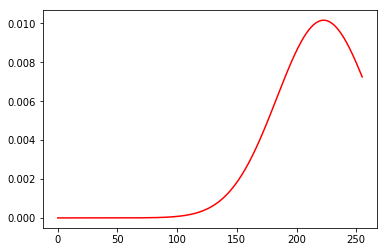

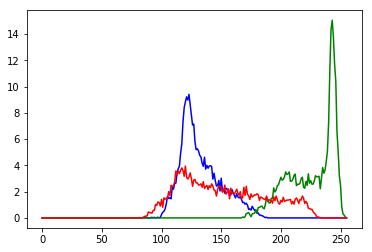

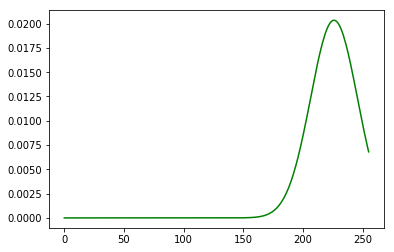

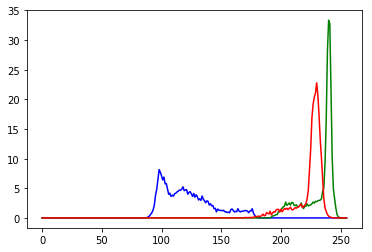

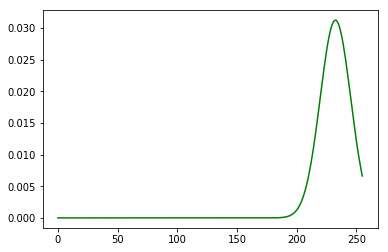

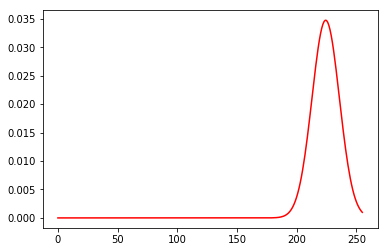

In [11]:
# #######################Project3_GMM_Fitting################################
# Team Members (Group Name - Project Group)
# PRANALI DESAI - 116182935
# NIKHIL MEHRA - 116189941
# SAYAN BRAHMA - 116309165
##############################################################################

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import copy

##############################################################################
# Function Name - calculateGaussianEquation
# Arguments - xcoor(numpy array of the x-coordinates for the Gaussian)
# mean(mean of the Gaussian), std(standard deviation of the Gaussian)
# Return - y-coordinates of the Gaussian(numpy array)
# Algorithm - Calculates y-coordinates of the Gaussian using the corresponding
# x-coordinates and the Gaussian equation.
##############################################################################

def calculateGaussianEquation(xcoor, mean, std):
    # 1/(sqrt(2*pi*std^2)) * e^(-(x-mean)^2 / 2*std^2)
    return (1/(std*math.sqrt(2*math.pi)))*np.exp(-np.power(xcoor - mean, 2.) / (2 * np.power(std, 2.)))

##############################################################################
# Function Name - prepareHistogramData
# Arguments - imagePath(path of images, string type), numberOfImages(integer),
# channel(integer)
# Return - Data used for preparing histogram (list)
# Algorithm - Count the number of pixels for each intensity from 0-255 and store
# them in the list
##############################################################################

def prepareHistogramData(imagePath, numberOfImages, channel):
    l1 = np.zeros((1, 256)) # Initializing the data with zero

    for i in range(1,numberOfImages+1): # Looping over all the images
        image = cv.imread(str(imagePath) +str(i) +".jpg") # Reading an image
        image2 = cv.GaussianBlur(image,(5,5),0) # Applying Gaussian Blur to every image
        image1 = image2[:,:,channel] # Extracting particular channel needed for making histogram
               
        for j in range(0, image1.shape[0]): # Looping over the length of each image
            for k in range(0, image1.shape[1]): # Looping over the width of each image
                l1[0][int(image1[j,k])] = l1[0][int(image1[j,k])] + 1 # Increase the number of count correponding to the pixel intensity
    
    l1 = l1 / numberOfImages # Divide the data by the total number of images
    return np.squeeze(l1)

##############################################################################
# Function Name - calculateMeanStd
# Arguments - data(list)
# Return - mean(mean of the input data(float)), std(standard deviation of the 
# input data)
##############################################################################

def calculateMeanStd(data):
        mean = sum(data*range(0,256))/sum(data)
        std = (np.sum(data*(np.array(range(0,256)) - mean)**2)/sum(data))**(1/2)
        return mean, std

# Histogram data of the blue channel of the orange buoy
redbuoy_b = prepareHistogramData("./red_buoy/", 131, 0)
# Histogram data of the green channel of the orange buoy
redbuoy_g = prepareHistogramData("./red_buoy/", 131, 1)
# Histogram data of the red channel of the orange buoy
redbuoy_r = prepareHistogramData("./red_buoy/", 131, 2)
plt.plot(range(0,256), redbuoy_b, 'b') # Plotting blue channel histogram with blue color
plt.plot(range(0,256), redbuoy_g, 'g') # Plotting green channel histogram with green color
plt.plot(range(0,256), redbuoy_r, 'r') # Plotting red channel histogram with red color
plt.show()

m3, s3 = calculateMeanStd(redbuoy_r) # Calculating mean and standard devaition of the red channel of the orange buoy
plt.plot(range(0,256), calculateGaussianEquation(range(0,256), m3, s3), 'r') # Plotting 1-D Gaussian of the red channel
plt.show()

# Histogram data of the blue channel of the green buoy
greenbuoy_b = prepareHistogramData("./green_buoy/", 42, 0)
# Histogram data of the green channel of the green buoy
greenbuoy_g = prepareHistogramData("./green_buoy/", 42, 1)
# Histogram data of the red channel of the green buoy
greenbuoy_r = prepareHistogramData("./green_buoy/", 42, 2)
plt.plot(range(0,256), greenbuoy_b, 'b') # Plotting blue channel histogram with blue color
plt.plot(range(0,256), greenbuoy_g, 'g') # Plotting green channel histogram with green color
plt.plot(range(0,256), greenbuoy_r, 'r') # Plotting red channel histogram with red color
plt.show()

m2, s2 = calculateMeanStd(greenbuoy_g) # Calculating mean and standard devaition of the green channel of the green buoy
plt.plot(range(0,256), calculateGaussianEquation(range(0,256), m2, s2), 'g') # Plotting 1-D Gaussian of the green channel
plt.show()

# Histogram data of the blue channel of the yellow buoy
yellowbuoy_b = prepareHistogramData("./yellow_buoy/", 42, 0)
# Histogram data of the green channel of the yellow buoy
yellowbuoy_g = prepareHistogramData("./yellow_buoy/", 42, 1)
# Histogram data of the red channel of the yellow buoy
yellowbuoy_r = prepareHistogramData("./yellow_buoy/", 42, 2)
plt.plot(range(0,256), yellowbuoy_b, 'b') # Plotting blue channel histogram with blue color
plt.plot(range(0,256), yellowbuoy_g, 'g') # Plotting green channel histogram with green color
plt.plot(range(0,256), yellowbuoy_r, 'r') # Plotting red channel histogram with red color
plt.show()

m2, s2 = calculateMeanStd(yellowbuoy_g) # Calculating mean and standard devaition of the green channel of the yellow buoy
plt.plot(range(0,256), calculateGaussianEquation(range(0,256), m2, s2), 'g') # Plotting 1-D Gaussian of the green channel
plt.show()

m3, s3 = calculateMeanStd(yellowbuoy_r) # Calculating mean and standard devaition of the red channel of the yellow buoy
plt.plot(range(0,256), calculateGaussianEquation(range(0,256), m3, s3), 'r') # Plotting 1-D Gaussian of the red channel
plt.show()

Gaussian Mixture Model of Red Buoy
[168.6998135053129, 239.97224895748565, 252.58555431109323] [36.65258219661637, 7.657707677274594, 2.292169445424823]


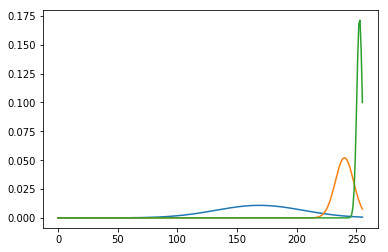

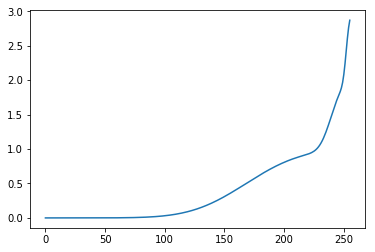

Gaussian Mixture Model of Green Buoy


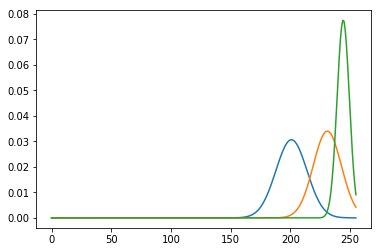

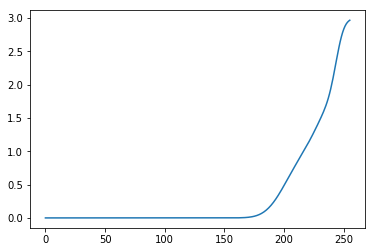

Gaussian Mixture Model of yellow Buoy


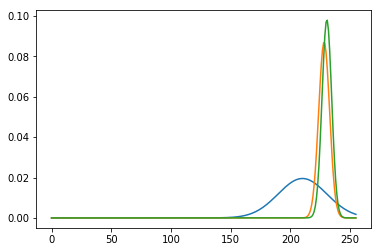

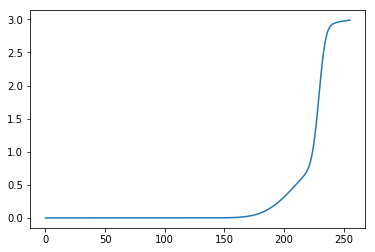

In [9]:
##############################################################################
# Function Name - calculateProbabilty
# Arguments - xcoor(numpy array of the x-coordinates for the Gaussian)
# mean(mean of the Gaussian), std(standard deviation of the Gaussian)
# Return - y-coordinates of the Gaussian(numpy array)
# Algorithm - Calculates y-coordinates of the Gaussian using the corresponding
# x-coordinates and the Gaussian equation.
##############################################################################

def calculateProbabilty(xcoor, mean, std):
    return (1/(std*math.sqrt(2*math.pi))) * np.exp(-(xcoor - mean)**2 / (2* std**(2)))

##############################################################################
# Function Name - em_gmm
# Arguments - imagePath(path of images, string type), numberOfImages(integer),
# channel(integer), noOfGaussians(integer), means(arbitary means for training 
# data(list)), stds(arbitary standard deviation of training data(list))
# Return - Trained parameters of the Gaussian i.e. mean and standard deviation
# Algorithm - Just like K-means clustering algorithm our data is trained using 
# Expected Maximization Algorithm using probailities and Bayesian probability.
# In each iteration mean and standard deviation are calculated so as to be used
# in next iterations.
##############################################################################

def em_gmm(imagePath, noOfImages, channels, noOfIterations, noOfGaussians, means, stds):
    pixel = [] # Variable for storing pixel intensity values for all the images

    for i in range(1, noOfImages+1): # Looping over all the images
        image = cv.imread(imagePath + str(i) + ".jpg") # Reading an image
        image = image[:, :, channel] # Extracting the channel required for training
        r, c = image.shape # Deteriming the shape of the image
        
        for j in range(0, r): # Looping over the length of the image
            for m in range(0, c): # Looping over the width of the image
                im = image[j][m] # Varaible for temporary storing the intensity value in the pixel
                pixel.append(im) # Appending each pixel for each image in the pixel list
                
    n = 0 # Variable used for looping over the number of iterations
    pixel = np.array(pixel, dtype = np.float64) # Converting the pixel list into the numpy array
    tempmeans = means # Variable used for storing means for each and every iteration
    tempstds = stds # Variable used for storing the standard deviation for each and every iteration

    while (n != noOfIterations): # While n is not equal to the number of iterations
        prob = [] # Variable for storing gaussian probablity for each pixel of an image
        bassianprob = [] # Variabel for storing bayesian proablity for each pixel of an image
        probGau = 1/noOfGaussians # Probablity of a choosing one Gaussian from the number of Gaussians

        for j in range(0,noOfGaussians): # Looping over the number of Gaussian
            # Add the gaussian probablity for each pixel of an image for each gaussian
            prob.append(calculateProbabilty(pixel, tempmeans[j], tempstds[j]))
        
        denom = np.zeros((1,len(pixel))) # Initializing denomiantor in order to calculate bayesian probability
        
        for j in prob: # Looping over all the probabilities form all the gaussians
            denom = denom + (np.array(j) * probGau) # Denom = P(A|G1)*P(G1) + P(A|G2)*P(G2) + P(A|G3)*P(G3) ..... n
       
        for j in prob: # Looping over all the probabilities form all the gaussians
            # Bayesian proablity = P(A|G1)*P(G1) / denom
            bassianprob.append(np.divide(np.array(j) * probGau, np.array(denom[0]))) 
        
        tempmeans = []
        tempstds = []
        for j in range(0, noOfGaussians): # Looping over all the Gaussains
            # Calculating new mean = (Bayesian Proabability) * (pixel intensities) / Sum(Bayesian Proabability)
            tempmeans.append(np.sum(bassianprob[j] * np.array(pixel)) / np.sum(bassianprob[j]))
            # Calculating new standard deviation = sqrt((Bayesian Proabability) * (pixel intensities - mean)^2 / Sum(Bayesian Proabability))
            tempstds.append(((np.sum(bassianprob[j] * ((np.array(pixel) - tempmeans[j]) ** (2)))) / (np.sum(bassianprob[j]))) ** (1 / 2))
        
        n = n + 1 # Increasing n by 1
        
    return tempmeans, tempstds # Returning new means and standard deviation

##############################################################################
# Function Name - drawGaussians
# Arguments - means(means of the N-Gaussian), stds(standard deviations of the N-Gaussian)
# Return - Plots Gaussian Mixture Model of the N-Gaussians along with the N-Gaussians
##############################################################################

def drawGaussians(means, stds):
    g = []
    y = []
    
    ran = list(range(256))
    
    for i in range(0, len(means)): # Looping over all the means
        plt.plot(ran, stats.norm.pdf(ran, means[i], stds[i]))
    plt.show()
    
    for i in range(0, len(means)): 
        g.append(calculateGaussianEquation(np.array(ran), means[i], stds[i]))
    
    temp = 0
    for i in range(0, len(g[0])):
        for j in range(0, len(g)):
            temp = temp + (1 * g[j][i])
        y.append(temp)
        
    plt.plot(ran, y)
    plt.show()

print('Gaussian Mixture Model of Red Buoy')
means, stds = em_gmm('./red_buoy/', 131, 2, 50, 3, [50, 100, 150], [10, 10, 10])
drawGaussians(means, stds)

print('Gaussian Mixture Model of Green Buoy')
means, stds = em_gmm('./green_buoy/', 42, 1, 50, 3, [50, 100, 150], [10, 10, 10])
drawGaussians(means, stds)

print('Gaussian Mixture Model of yellow Buoy')
means, stds = em_gmm('./yellow_buoy/', 42, 2, 50, 3, [50, 100, 150], [10, 10, 10])
drawGaussians(means, stds)